In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import collections
from time import perf_counter
from tensorflow.keras.models import load_model

In [3]:
model = load_model(r"D:/Research/Model/model_gray_64")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 dropout (Dropout)           (None, 29, 29, 32)        0         
                                                                 
 flatten (Flatten)           (None, 26912)             0         
                                                                 
 dense (Dense)               (None, 128)               3444864   
                                                        

In [118]:
# def number_of_elements(img):
#     H = []
#     S = []
#     V = []
#     for i in range(0,32):
#         for j in range(0,32):
#             H.append(img[i][j][0])
#             S.append(img[i][j][1])
#             V.append(img[i][j][2])
#     return H, S, V

In [119]:
def reverse_img(img,size):
    for i in range(size):
        for j in range(size):
            if img[i][j] == 0:
                img[i][j] = 255
            else:
                img[i][j] = 0

In [5]:
start = perf_counter()
pic = r"D:/Research/Frame/testImage/g1_test.png"
img = cv2.imread(pic)
#plt.imshow(img)
# img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img = cv2.bitwise_not(img)
# img = cv2.resize(img,(32,32))
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
_,img_bin = cv2.threshold(img_gray,140,255,cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(img_bin, cv2.RETR_EXTERNAL,
                                        cv2.CHAIN_APPROX_SIMPLE)
# img_contour = cv2.drawContours(img, contours, -1, (0, 255, 0), 5)
contour = max(contours,key=lambda x:cv2.contourArea(x))
mask = np.zeros_like(img_bin)
cv2.drawContours(mask,[contour],-1,color=255,thickness=-1)
mask = cv2.resize(mask,(64,64))
# plt.gray()
# plt.imshow(mask)

# _, img = cv2.threshold(img, 135, 255, cv2.THRESH_BINARY)
# img = cv2.resize(img,(32,32))
# plt.gray()
# reverse_img(img,32)
# contours, hierarchy = cv2.findContours(img, cv2.RETR_EXTERNAL,
#                                        cv2.CHAIN_APPROX_SIMPLE)
# contours = list(filter(lambda x: cv2.contourArea(x) > 1000, contours))
# cv2.drawContours(img, contours, -1, color=(0, 0, 255), thickness=2)
# plt.imshow(img)
img = mask.reshape(1,64,64,1)
test = model.predict(img)
np.set_printoptions(formatter={'float':'{:.4f}'.format})
print(test)
index = np.argmax(test)
print('Gesture:',index+1)
print(perf_counter() -start)

[[0.0000 1.0000 0.0000 0.0000 0.0000]]
Gesture: 2
0.05100819999999828


[[0.0000 1.0000 0.0000 0.0000 0.0000]]
Gesture: 2


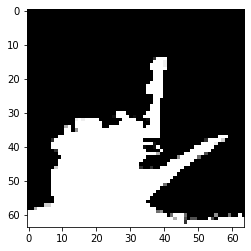

In [121]:
pic = r"D:/Research/Frame/testImage/g2_test.png"
img = cv2.imread(pic)
#plt.imshow(img)
# img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img = cv2.bitwise_not(img)
# img = cv2.resize(img,(32,32))
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
_,img_bin = cv2.threshold(img_gray,128,255,cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(img_bin, cv2.RETR_EXTERNAL,
                                        cv2.CHAIN_APPROX_SIMPLE)
# img_contour = cv2.drawContours(img, contours, -1, (0, 255, 0), 5)
contour = max(contours,key=lambda x:cv2.contourArea(x))
mask = np.zeros_like(img_bin)
cv2.drawContours(mask,[contour],-1,color=255,thickness=-1)
mask = cv2.resize(mask,(64,64))
plt.gray()
plt.imshow(mask)

# _, img = cv2.threshold(img, 135, 255, cv2.THRESH_BINARY)
# img = cv2.resize(img,(32,32))
# plt.gray()
# reverse_img(img,32)
# contours, hierarchy = cv2.findContours(img, cv2.RETR_EXTERNAL,
#                                        cv2.CHAIN_APPROX_SIMPLE)
# contours = list(filter(lambda x: cv2.contourArea(x) > 1000, contours))
# cv2.drawContours(img, contours, -1, color=(0, 0, 255), thickness=2)
# plt.imshow(img)
img = mask.reshape(1,64,64,1)
test = model.predict(img)
np.set_printoptions(formatter={'float':'{:.4f}'.format})
print(test)
index = np.argmax(test)
print('Gesture:',index+1)


[[0.0000 0.0112 0.0000 0.9888 0.0000]]
Gesture: 4


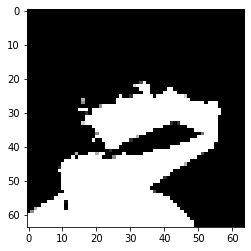

In [145]:
pic = r"D:/Research/Frame/testImage/g3_test.png"
img = cv2.imread(pic)
#plt.imshow(img)
# img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img = cv2.bitwise_not(img)
# img = cv2.resize(img,(32,32))
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
_,img_bin = cv2.threshold(img_gray,130,255,cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(img_bin, cv2.RETR_EXTERNAL,
                                        cv2.CHAIN_APPROX_SIMPLE)
# img_contour = cv2.drawContours(img, contours, -1, (0, 255, 0), 5)
contour = max(contours,key=lambda x:cv2.contourArea(x))
mask = np.zeros_like(img_bin)
cv2.drawContours(mask,[contour],-1,color=255,thickness=-1)
mask = cv2.resize(mask,(64,64))
plt.gray()
plt.imshow(mask)

# _, img = cv2.threshold(img, 135, 255, cv2.THRESH_BINARY)
# img = cv2.resize(img,(32,32))
# plt.gray()
# reverse_img(img,32)
# contours, hierarchy = cv2.findContours(img, cv2.RETR_EXTERNAL,
#                                        cv2.CHAIN_APPROX_SIMPLE)
# contours = list(filter(lambda x: cv2.contourArea(x) > 1000, contours))
# cv2.drawContours(img, contours, -1, color=(0, 0, 255), thickness=2)
# plt.imshow(img)
img = mask.reshape(1,64,64,1)
test = model.predict(img)
np.set_printoptions(formatter={'float':'{:.4f}'.format})
print(test)
index = np.argmax(test)
print('Gesture:',index+1)

[[0.0000 0.0017 0.0002 0.9982 0.0000]]
Gesture: 4


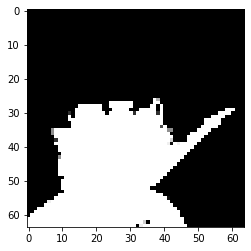

In [123]:
pic = r"D:/Research/Frame/testImage/g4_test.png"
img = cv2.imread(pic)
#plt.imshow(img)
# img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img = cv2.bitwise_not(img)
# img = cv2.resize(img,(32,32))
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
_,img_bin = cv2.threshold(img_gray,128,255,cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(img_bin, cv2.RETR_EXTERNAL,
                                        cv2.CHAIN_APPROX_SIMPLE)
# img_contour = cv2.drawContours(img, contours, -1, (0, 255, 0), 5)
contour = max(contours,key=lambda x:cv2.contourArea(x))
mask = np.zeros_like(img_bin)
cv2.drawContours(mask,[contour],-1,color=255,thickness=-1)
mask = cv2.resize(mask,(64,64))
plt.gray()
plt.imshow(mask)

# _, img = cv2.threshold(img, 135, 255, cv2.THRESH_BINARY)
# img = cv2.resize(img,(32,32))
# plt.gray()
# reverse_img(img,32)
# contours, hierarchy = cv2.findContours(img, cv2.RETR_EXTERNAL,
#                                        cv2.CHAIN_APPROX_SIMPLE)
# contours = list(filter(lambda x: cv2.contourArea(x) > 1000, contours))
# cv2.drawContours(img, contours, -1, color=(0, 0, 255), thickness=2)
# plt.imshow(img)
img = mask.reshape(1,64,64,1)
test = model.predict(img)
np.set_printoptions(formatter={'float':'{:.4f}'.format})
print(test)
index = np.argmax(test)
print('Gesture:',index+1)


[[0.0000 0.0000 0.0000 0.0002 0.9998]]
Gesture: 5


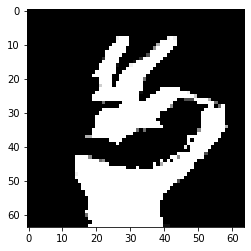

In [124]:
pic = r"D:/Research/Frame/testImage/g5_test.png"
img = cv2.imread(pic)
#plt.imshow(img)
# img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img = cv2.bitwise_not(img)
# img = cv2.resize(img,(32,32))
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
_,img_bin = cv2.threshold(img_gray,128,255,cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(img_bin, cv2.RETR_EXTERNAL,
                                        cv2.CHAIN_APPROX_SIMPLE)
# img_contour = cv2.drawContours(img, contours, -1, (0, 255, 0), 5)
contour = max(contours,key=lambda x:cv2.contourArea(x))
mask = np.zeros_like(img_bin)
cv2.drawContours(mask,[contour],-1,color=255,thickness=-1)
mask = cv2.resize(mask,(64,64))
plt.gray()
plt.imshow(mask)

# _, img = cv2.threshold(img, 135, 255, cv2.THRESH_BINARY)
# img = cv2.resize(img,(32,32))
# plt.gray()
# reverse_img(img,32)
# contours, hierarchy = cv2.findContours(img, cv2.RETR_EXTERNAL,
#                                        cv2.CHAIN_APPROX_SIMPLE)
# contours = list(filter(lambda x: cv2.contourArea(x) > 1000, contours))
# cv2.drawContours(img, contours, -1, color=(0, 0, 255), thickness=2)
# plt.imshow(img)
img = mask.reshape(1,64,64,1)
test = model.predict(img)
np.set_printoptions(formatter={'float':'{:.4f}'.format})
print(test)
index = np.argmax(test)
print('Gesture:',index+1)


In [125]:
# H,S,V = number_of_elements(img)
# h = collections.Counter(H)
# s = collections.Counter(S)
# v = collections.Counter(V)
# new_h = sorted(H)

In [126]:
# plt.hist(new_h,bins=180)

In [127]:
# plt.hist(S,bins=255)

In [128]:
# plt.hist(V,bins=255)

In [129]:
# lower = np.array([0,0,0],dtype='uint8')
# upper = np.array([90,10,255],dtype='uint8')
# skinRegionHSV = cv2.inRange(img, lower, upper)
# bin = cv2.blur(skinRegionHSV,(2,2))
# _,thresh = cv2.threshold(bin,0,255,cv2.THRESH_BINARY)
# plt.imshow(thresh)

In [130]:
# for i in range(0,32):
#     for j in range(0,32):
#         if thresh[i][j] == 0:
#             thresh[i][j] = 255
#         else:
#             thresh[i][j] = 0

In [131]:
# plt.imshow(thresh)

In [132]:
# #輪郭抽出
# contours,hierarchy = cv2.findContours(thresh,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
# print(contours)
# contours = list(filter(lambda x: cv2.contourArea(x) > 50,contours))
# cv2.drawContours(thresh,contours,-1,color=(0,0,255),thickness=2)
# plt.imshow(thresh)

In [133]:
# for i in range(0,32):
#     for j in range(0,32):
#         if thresh[i][j] == 0:
#             thresh[i][j] = 255
#         else:
#             thresh[i][j] = 0

In [134]:
# thresh = thresh.reshape(1,64,64,1)

In [135]:
# test = model.predict(thresh)
# print(test)